In [2]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as stats
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.power import TTestIndPower


In [3]:
#import csv data 
races = pd.read_csv('src/races.csv')
runs = pd.read_csv('src/runs.csv')

In [4]:
# view columns features races data
races.columns

Index(['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class', 'sec_time1',
       'sec_time2', 'sec_time3', 'sec_time4', 'sec_time5', 'sec_time6',
       'sec_time7', 'time1', 'time2', 'time3', 'time4', 'time5', 'time6',
       'time7', 'place_combination1', 'place_combination2',
       'place_combination3', 'place_combination4', 'place_dividend1',
       'place_dividend2', 'place_dividend3', 'place_dividend4',
       'win_combination1', 'win_dividend1', 'win_combination2',
       'win_dividend2'],
      dtype='object')

In [5]:
# view columns and features races data
runs.columns

Index(['race_id', 'horse_no', 'horse_id', 'result', 'won', 'lengths_behind',
       'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw',
       'position_sec1', 'position_sec2', 'position_sec3', 'position_sec4',
       'position_sec5', 'position_sec6', 'behind_sec1', 'behind_sec2',
       'behind_sec3', 'behind_sec4', 'behind_sec5', 'behind_sec6', 'time1',
       'time2', 'time3', 'time4', 'time5', 'time6', 'finish_time', 'win_odds',
       'place_odds', 'trainer_id', 'jockey_id'],
      dtype='object')

In [6]:
# curious about weight features

runs['actual_weight'].head(10)

0    133
1    133
2    132
3    127
4    131
5    127
6    123
7    128
8    123
9    125
Name: actual_weight, dtype: int64

In [7]:
# find max of actual_weight for jockey
jockey_max = runs['actual_weight'].max()
jockey_max

133

In [8]:
# find min of actual_weight for jockey
jockey_min = runs['actual_weight'].min()
jockey_min

103

In [9]:
# determine range of actual_weight for jockey
jockweight_range = jockey_max - jockey_min
jockweight_range

30

In [10]:
# find max of declared_weight for horse
horse_max = runs['declared_weight'].max()
horse_max

1369.0

In [11]:
# find min of declared_weight for horse
horse_min = runs['declared_weight'].min()
horse_min

693.0

In [12]:
# determine range of declared_weight for horse
horseweight_range = horse_max - horse_min
horseweight_range

676.0

In [13]:
#check for & count null/ NaN values in each column
runs.isnull().sum(axis = 0)

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
horse_gear             0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4              33221
time5              69368
time6              78151
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
dtype: int64

In [14]:
# fill in 0's for NaN values in times for non-existent portions of race
runs['time4'].fillna(0, inplace=True)
runs['time5'].fillna(0, inplace=True)
runs['time6'].fillna(0, inplace=True)

#check to see if fill in worked
runs.isnull().sum(axis = 0)

race_id                0
horse_no               0
horse_id               0
result                 0
won                    0
lengths_behind         0
horse_age              0
horse_country          2
horse_type             2
horse_rating           0
horse_gear             0
declared_weight        0
actual_weight          0
draw                   0
position_sec1          0
position_sec2          0
position_sec3          0
position_sec4      33221
position_sec5      69368
position_sec6      78151
behind_sec1            0
behind_sec2            0
behind_sec3            0
behind_sec4        33221
behind_sec5        69368
behind_sec6        78151
time1                  0
time2                  0
time3                  0
time4                  0
time5                  0
time6                  0
finish_time            0
win_odds               0
place_odds          3735
trainer_id             0
jockey_id              0
dtype: int64

In [15]:
# curious about feature draw - post position in line up
draw_max = runs['draw'].max()
draw_min = runs['draw'].min()
draw_min, draw_max

(1, 15)

In [16]:
#narrow down focus of columns/ features from run data desired to analyze

runs_data = runs[['race_id', 'won', 'horse_age', 'horse_country', 'horse_type', 'horse_rating',
       'horse_gear', 'declared_weight', 'actual_weight', 'draw', 'win_odds',
       'place_odds','time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'horse_id']]
# runs_data.head()

In [17]:
#narrow down focus of columns/ features from races data desired to analyze
races_data = races[['race_id', 'date', 'venue', 'race_no', 'config', 'surface', 'distance',
       'going', 'horse_ratings', 'prize', 'race_class']]
# races_data.head()

In [18]:
# merge the two datasets based on race_id column
df = pd.merge(runs_data, races_data)
df.describe()

,race_id,won,horse_age,horse_rating,declared_weight,actual_weight,draw,win_odds,place_odds,time1,...,time3,time4,time5,time6,horse_id,race_no,surface,distance,prize,race_class
count,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,75712.000000,79447.000000,...,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,79447.000000,7.359800e+04,79447.000000
mean,3173.352814,0.080053,3.339346,61.034904,1104.953568,122.729656,6.876005,28.812977,7.423177,21.135438,...,23.864054,13.987405,3.058096,0.397219,2204.410525,5.280086,0.108865,1419.195816,1.117461e+06,3.873136
std,1833.101494,0.271378,0.876763,11.748788,62.347597,6.305496,3.747589,30.097375,8.823430,6.930518,...,3.571163,12.379825,8.032828,3.089157,1275.049375,2.812404,0.311472,277.221341,1.734767e+06,1.923251
min,0.000000,0.000000,2.000000,10.000000,693.000000,103.000000,1.000000,1.000000,1.000000,12.390000,...,21.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1000.000000,4.850000e+05,0.000000
25%,1586.000000,0.000000,3.000000,60.000000,1062.000000,118.000000,4.000000,7.700000,2.400000,14.120000,...,23.230000,0.000000,0.000000,0.000000,1085.000000,3.000000,0.000000,1200.000000,6.400000e+05,3.000000
50%,3174.000000,0.000000,3.000000,60.000000,1102.000000,123.000000,7.000000,15.000000,4.100000,24.180000,...,23.760000,23.010000,0.000000,0.000000,2209.000000,5.000000,0.000000,1400.000000,8.000000e+05,4.000000
75%,4764.500000,0.000000,3.000000,60.000000,1146.000000,128.000000,10.000000,38.000000,8.600000,25.360000,...,24.410000,24.050000,0.000000,0.000000,3308.000000,8.000000,0.000000,1650.000000,1.060000e+06,4.000000
max,6348.000000,1.000000,10.000000,138.000000,1369.000000,133.000000,15.000000,99.000000,101.000000,999.000000,...,999.000000,999.000000,49.570000,34.150000,4404.000000,11.000000,1.000000,2400.000000,2.500000e+07,13.000000


In [19]:
# view new merged full DataFrame columns
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class'],
      dtype='object')

In [20]:
# want to analyze time over distance
#take 1st 3 distances as no Null/ NaN values in data
#create new column for total_time

df['total_time'] = (df['time1'] + df['time2'] + df['time3'])
# df['total_time'].head(10)

In [21]:
#add avg time per section column
df['avg_time'] = (df['time1'] +df['time2'] +df['time3'])/3
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'total_time', 'avg_time'],
      dtype='object')

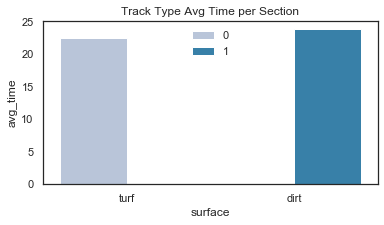

<Figure size 432x288 with 0 Axes>

In [291]:
#curious about track type breakdown on avg time per section

fig, ax = plt.subplots(figsize = (6, 3))
x = [0,1]
labels = ["turf", "dirt"]
sns.set(style="white")
sns.barplot(x = 'surface',y= 'avg_time', data=df, hue= 'surface', palette="PuBu")
plt.title("Track Type Avg Time per Section")
plt.xticks(x, labels)
plt.legend(loc='upper center')
plt.show()
plt.savefig('tracktype_avg_time_bar.png')



In [23]:
#curious about country type breakdown of each horse
country_type = df[['horse_id','horse_type', 'surface', 'horse_country']].groupby('horse_country')['horse_id'].nunique()
country_type

horse_country
ARG      10
AUS    1722
BRZ       2
CAN       6
FR       89
GB      325
GER      20
GR        1
IRE     567
ITY       4
JPN      44
NZ     1407
SAF      44
SPA       1
USA     161
ZIM       1
Name: horse_id, dtype: int64

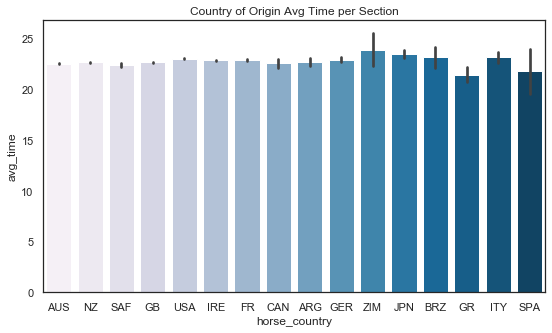

In [24]:
#curious about country breakdown on avg time per section
fig, ax = plt.subplots(figsize = (9, 5))
sns.set(style="white")
sns.barplot(x = 'horse_country',y= 'avg_time', data= df, palette="PuBu")
plt.title("Country of Origin Avg Time per Section")
plt.show()
# plt.savefig('country_avg_time_bar.png')

In [25]:
#helper function group jockey weights into 10 groups of 3 lbs

def group_jockweight(row):
    if row['actual_weight'] >= 130:
        return "10_class"
    if row['actual_weight'] < 130 and row['actual_weight'] >= 127:
        return "9_class"
    if row['actual_weight'] < 127 and row['actual_weight'] >= 124:
        return "8_class"
    if row['actual_weight'] < 124 and row['actual_weight'] >= 121:
        return "7_class"
    if row['actual_weight'] < 121 and row['actual_weight'] >= 118:
        return "6_class"
    if row['actual_weight'] < 118 and row['actual_weight'] >= 115:
        return "5_class"
    if row['actual_weight'] < 115 and row['actual_weight'] >= 112:
        return "4_class"
    if row['actual_weight'] < 112 and row['actual_weight'] >= 109:
        return "3_class"
    if row['actual_weight'] < 109 and row['actual_weight'] >= 106:
        return "2_class"
    if row['actual_weight'] < 106 and row['actual_weight'] >= 103:
        return "1_class"
    return "other"

    

In [26]:
# update DataFrame for jockey weight class column calculated
df["weight_class"] = df.apply(lambda row: group_jockweight(row), axis=1)
df[["actual_weight","weight_class"]].head()

,actual_weight,weight_class
0,133,10_class
1,133,10_class
2,132,10_class
3,127,9_class
4,131,10_class


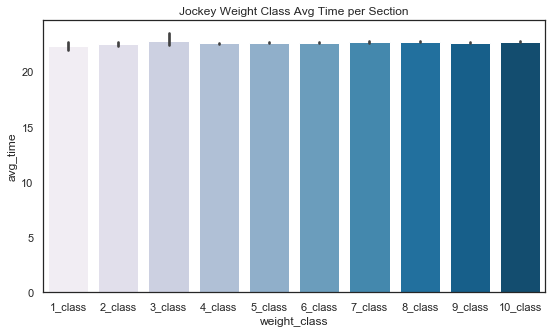

In [27]:
#curious about jockey weight breakdown on avg time per section
fig, ax = plt.subplots(figsize = (9, 5))
weight_order = ['1_class', '2_class', '3_class',
                '4_class','5_class','6_class',
                '7_class','8_class','9_class', '10_class']
plt.style.use('ggplot') 
sns.set(style="white")
sns.barplot(x = 'weight_class',y= 'avg_time', order = weight_order, data= df, palette="PuBu")
plt.title("Jockey Weight Class Avg Time per Section")
plt.show()
# plt.savefig('jockweight_avg_time_bar.png')

In [28]:
#helper function group jockey weights into 8 groups of 100 lbs

def group_horseweight(row):
    if row['declared_weight'] >= 1350:
        return "8_class"
    if row['declared_weight'] < 1350 and row['declared_weight'] >= 1250:
        return "7_class"
    if row['declared_weight'] < 1250 and row['declared_weight'] >= 1150:
        return "6_class"
    if row['declared_weight'] < 1150 and row['declared_weight'] >= 1050:
        return "5_class"
    if row['declared_weight'] < 1050 and row['declared_weight'] >= 950:
        return "4_class"
    if row['declared_weight'] < 950 and row['declared_weight'] >= 850:
        return "3_class"
    if row['declared_weight'] < 850 and row['declared_weight'] >= 750:
        return "2_class"
    if row['declared_weight'] < 750 and row['declared_weight'] >= 650:
        return "1_class"
    return "other"

In [29]:
# update DataFrame for horse weight class column calculated
df["horseweight_class"] = df.apply(lambda row: group_horseweight(row), axis=1)

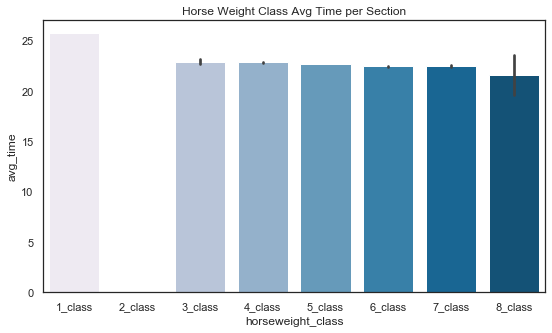

In [30]:
#curious about jockey weight breakdown on avg time per section
fig, ax = plt.subplots(figsize = (9, 5))
weight_order = ['1_class', '2_class', '3_class',
                '4_class','5_class','6_class',
                '7_class','8_class']

sns.set(style="white")
sns.barplot(x = 'horseweight_class',y= 'avg_time', order= weight_order, data= df, palette="PuBu")
plt.title("Horse Weight Class Avg Time per Section")
plt.show()
# plt.savefig('horseweight_avg_time_bar.png')

In [31]:
#review full DataFrame columns again
df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'total_time', 'avg_time', 'weight_class', 'horseweight_class'],
      dtype='object')

In [32]:
#remove the MAJOR outliers
df = df[(df['total_time'] < 90)]

In [33]:
total_time_df = df[(df['total_time'] < 90)]

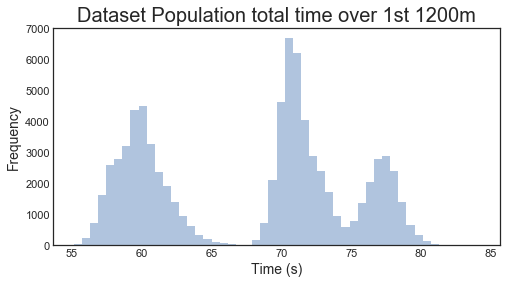

In [299]:
# Full population histogram TOTAL TIME

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (8, 4))
data = df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='lightsteelblue',
         edgecolor='none');
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Dataset Population total time over 1st 1200m", fontsize=20);
# plt.savefig('dfpop_total_time_histo.png')

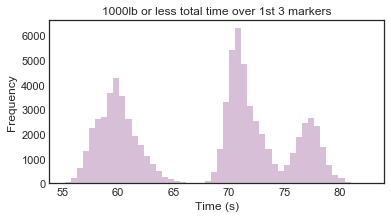

In [35]:
# Weight over 1000 lbs histogram TOTAL TIME

total_time_1000_df = df[(df['declared_weight'] > 1000)]

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = total_time_1000_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='thistle',
         edgecolor='none');
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("1000lb or less total time over 1st 3 markers");
# plt.savefig('1000lb_total_time_histo.png')

In [36]:
# create dirt and turf DataFrames and remove outliers
dirt_df = df[df['surface'] == 1]
turf_df = df[df['surface'] == 0]
turf_df = df[df['total_time'] < 90]

# create Pandas Series for Turf and Dirt
dirt_time_df = dirt_df['total_time']
turf_time_df = turf_df['total_time']

#create data array for dirt avg time
dirt_time = np.array(dirt_time_df)
#create data array for turf avg time
turf_time = np.array(turf_time_df)

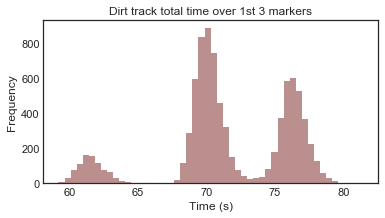

In [37]:
#time dirt only histogram TOTAL TIME

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = dirt_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='rosybrown',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Dirt track total time over 1st 3 markers");
# plt.savefig('dirt_total_time_histo.png')

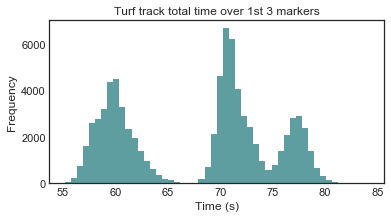

In [38]:
#time turf only histogram TOTAL TIME
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = turf_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='cadetblue',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Turf track total time over 1st 3 markers");
# plt.savefig('turf_total_time_histo.png')

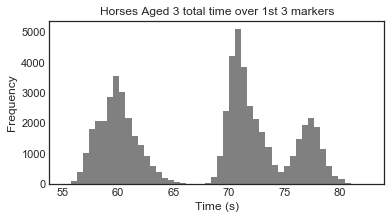

In [39]:
# histogram TOTAL TIME horse age 3
total_time_3_df = total_time_df[(total_time_df['horse_age'] == 3)]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = total_time_3_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='gray',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Horses Aged 3 total time over 1st 3 markers");
# plt.savefig('3yr_total_time_histo.png')

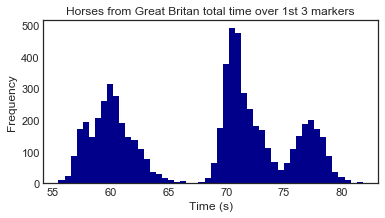

In [40]:
# histogram TOTAL TIME country GB

total_time_GB_df = total_time_df[(total_time_df['horse_country'] == 'GB')]
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = total_time_GB_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='darkblue',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Horses from Great Britan total time over 1st 3 markers");
# plt.savefig('GB_total_time_histo.png')

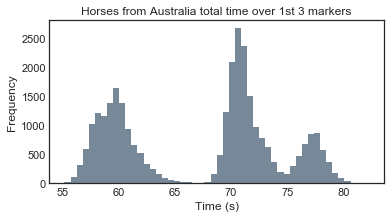

In [41]:
# histogram TOTAL TIME country AUS
plt.style.use('seaborn-white')

total_time_AUS_df = total_time_df[(total_time_df['horse_country'] == 'AUS')]

fig, ax = plt.subplots(figsize = (6, 3))
data = total_time_AUS_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='lightslategrey',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Horses from Australia total time over 1st 3 markers");
# plt.savefig('AUS_total_time_histo.png')

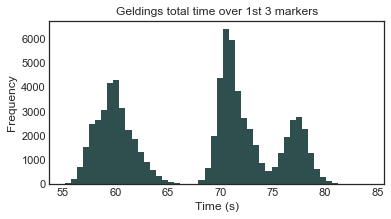

In [42]:
# histogram TOTAL TIME horse type gelding
plt.style.use('seaborn-white')

total_time_geld_df = total_time_df[(total_time_df['horse_type'] == 'Gelding')]

fig, ax = plt.subplots(figsize = (6, 3))
data = total_time_geld_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='darkslategrey',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Geldings total time over 1st 3 markers");
# plt.savefig('geld_total_time_histo.png')

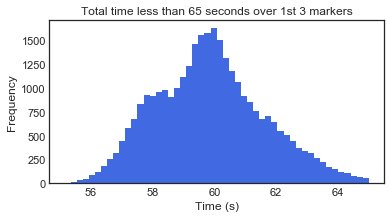

In [43]:
#evaluate if there is some feature that designates the speed distribution
#create a new dataframe to slice first mode of population

feature_time1_df = df[['total_time', 'surface', 'horse_age', 'horse_country', 'horse_type', 'venue', 'distance']]
feature_time1_df = feature_time1_df[(feature_time1_df['total_time'] < 65)]

# histogram TOTAL TIME less than 65
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = feature_time1_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='royalblue',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Total time less than 65 seconds over 1st 3 markers");
# plt.savefig('less65_total_time_histo.png')

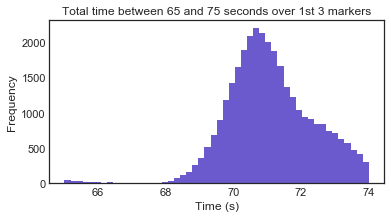

In [44]:
#create a new dataframe to slice middle mode of population
feature_time2_df = df[['total_time', 'surface', 'horse_age', 'horse_country', 'horse_type', 'venue', 'distance']]
feature_time2_df = feature_time2_df[(feature_time2_df['total_time'] >= 65) & (feature_time2_df['total_time'] <= 74)]

# histogram TOTAL TIME greater than 65 less than 75
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = feature_time2_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='slateblue',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Total time between 65 and 75 seconds over 1st 3 markers");
# plt.savefig('btwn_total_time_histo.png')

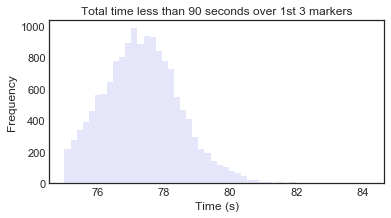

In [45]:
#create a new dataframe to slice last mode of population
feature_time3_df = df[['total_time', 'surface', 'horse_age', 'horse_country', 'horse_type', 'venue', 'distance']]
feature_time3_df = feature_time3_df[(feature_time3_df['total_time'] > 75)]

# histogram TOTAL TIME greater than 75
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = feature_time3_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='lavender',
         edgecolor='none')
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Total time less than 90 seconds over 1st 3 markers");
# plt.savefig('great75_total_time_histo.png')

In [46]:
#evaluate if there is some feature that designates the speed distribution >> Distance of overall race
df['distance'].value_counts()

1200    24695
1400    14564
1650    13253
1000     8523
1600     8329
1800     7320
2000     1463
2200     1034
2400      262
Name: distance, dtype: int64

In [47]:
#create a new dataframe for new sub-population_races of 1200m
total_time_dist1_df = df[(df['distance'] == 1200)]

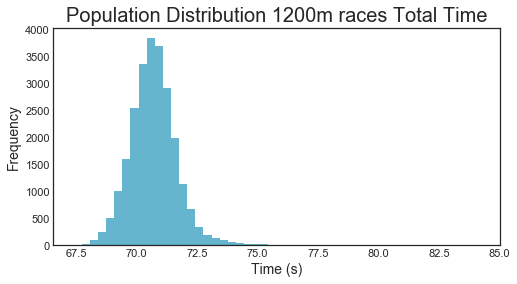

In [308]:
# histogram for new population to analyze: Distance 1200
plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (8, 4))
data = total_time_dist1_df['total_time']
plt.hist(data, bins=50,
         histtype='stepfilled', color='c',
         edgecolor='none')
plt.xlabel("Time (s)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Population Distribution 1200m races Total Time", fontsize=20);
plt.savefig('Population Distribution 1200m_total_time_histo.png')

# Population: Race distance 1200m (NORMAL DISTRIB)

In [49]:
# pandas drop columns using list of column names for heatmap
total_time_dist1_df_clean = total_time_dist1_df.drop(['time4', 'time5', 'time6', 'surface', 'distance'], axis=1)
total_time_dist1_df.columns

Index(['race_id', 'won', 'horse_age', 'horse_country', 'horse_type',
       'horse_rating', 'horse_gear', 'declared_weight', 'actual_weight',
       'draw', 'win_odds', 'place_odds', 'time1', 'time2', 'time3', 'time4',
       'time5', 'time6', 'horse_id', 'date', 'venue', 'race_no', 'config',
       'surface', 'distance', 'going', 'horse_ratings', 'prize', 'race_class',
       'total_time', 'avg_time', 'weight_class', 'horseweight_class'],
      dtype='object')

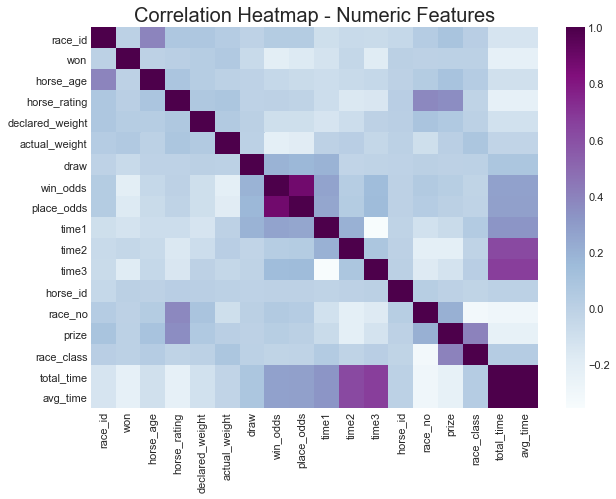

In [313]:
# correlation heatmap of numeric features
# not super helpful as much of my data is categorical
fig, ax = plt.subplots(figsize = (10, 7))
sns.heatmap(total_time_dist1_df_clean.corr(),cmap="BuPu")
plt.title("Correlation Heatmap - Numeric Features", fontsize=20);
plt.savefig('corr_heatmap.png')

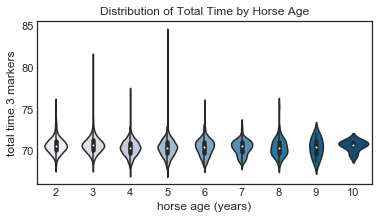

In [51]:
#Distribution of Total Time by Horse Age

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
sns.violinplot(x='horse_age', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("horse age (years)")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Horse Age");
# plt.savefig('age_total_time_vio.png')

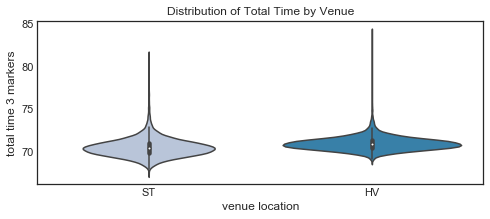

In [52]:
#Distribution of Total Time by Venue

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (8, 3))
sns.violinplot(x='venue', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("venue location")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Venue");
# plt.savefig('venue_total_time_vio.png')

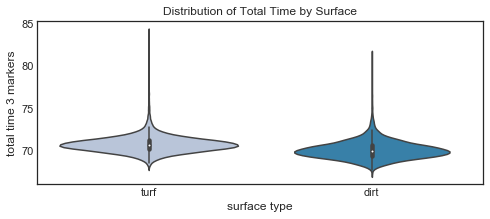

In [53]:
#Distribution of Total Time by Surface

plt.style.use('seaborn-white')

x = [0,1]
labels = ["turf", "dirt"]

fig, ax = plt.subplots(figsize = (8, 3))
sns.violinplot(x='surface', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xticks(x, labels)
plt.xlabel("surface type")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Surface");
# plt.savefig('surface_total_time_vio.png')

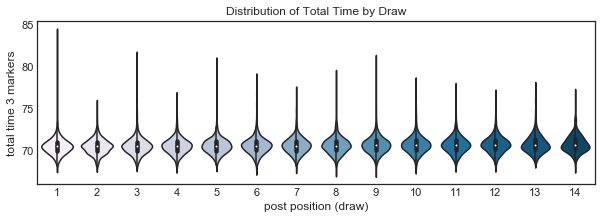

In [54]:
#Distribution of Total Time by Draw

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 3))
sns.violinplot(x='draw', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("post position (draw)")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Draw");
# plt.savefig('draw_total_time_vio.png')

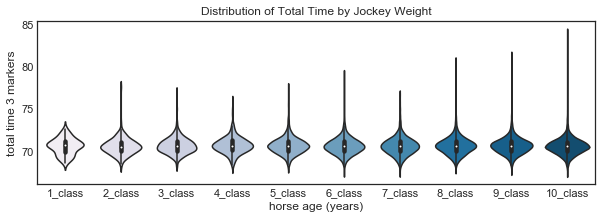

In [55]:
#Distribution of Total Time by Jockey Weight class

plt.style.use('seaborn-white')

weight_order = ['1_class', '2_class', '3_class',
                '4_class','5_class','6_class',
                '7_class','8_class','9_class', '10_class']
fig, ax = plt.subplots(figsize = (10, 3))
sns.violinplot(x='weight_class', y='total_time', data=total_time_dist1_df, 
              order= weight_order, palette= "PuBu")
plt.xlabel("horse age (years)")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Jockey Weight");
# plt.savefig('jockweight_total_time_vio.png')

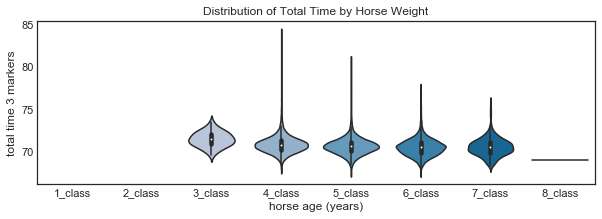

In [56]:
#Distribution of Total Time by Horse Weight class

plt.style.use('seaborn-white')

weight_order = ['1_class', '2_class', '3_class',
                '4_class','5_class','6_class',
                '7_class','8_class'] 
fig, ax = plt.subplots(figsize = (10, 3))
sns.violinplot(x='horseweight_class', y='total_time', data=total_time_dist1_df, 
              order = weight_order, palette= "PuBu")
plt.xlabel("horse age (years)")
plt.ylabel("total time 3 markers")
plt.title("Distribution of Total Time by Horse Weight");
# plt.savefig('horseweight_total_time_vio.png')

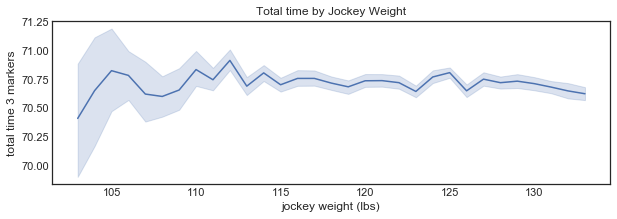

In [57]:
#Line Chart jockey weight vs total time

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 3))
sns.lineplot(x='actual_weight', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("jockey weight (lbs)")
plt.ylabel("total time 3 markers")
plt.title("Total time by Jockey Weight");
# plt.savefig('jockweight_total_time_line.png')

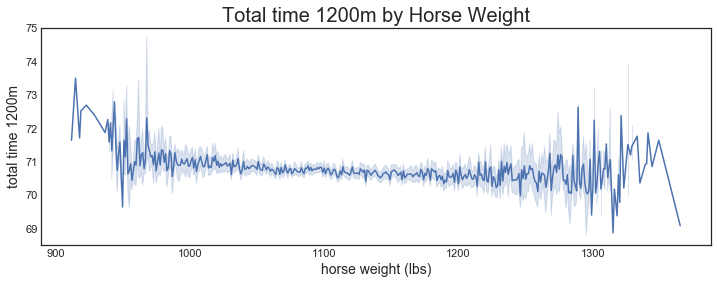

In [332]:
#Line Chart horse weight vs total time

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (12, 4))
sns.lineplot(x='declared_weight', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("horse weight (lbs)", fontsize=14)
plt.ylabel("total time 1200m", fontsize=14)
plt.title("Total time 1200m by Horse Weight", fontsize=20)
bbox_inches='tight';
# plt.savefig('horseweight_total_time_line.png')

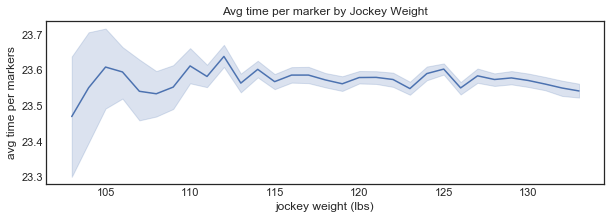

In [58]:
#Line Chart jockey weight vs avg time per marker

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 3))
sns.lineplot(x='actual_weight', y='avg_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("jockey weight (lbs)")
plt.ylabel("avg time per markers")
plt.title("Avg time per marker by Jockey Weight");
# plt.savefig('jockweight_avg_time_line.png')

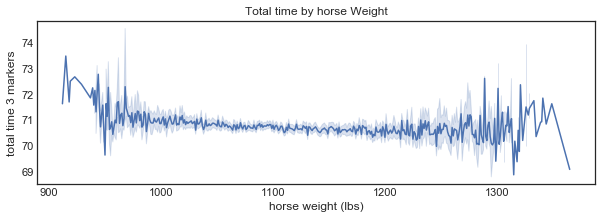

In [320]:
#Line Chart horse weight vs total time

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (10, 3))
sns.lineplot(x='declared_weight', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("horse weight (lbs)")
plt.ylabel("total time 3 markers")
plt.title("Total time by horse Weight");
# plt.savefig('horseweight_total_time_line.png')

In [60]:
# make new df column to clean up date
df['clean_date'] = pd.to_datetime(df.date)
df['clean_date'].describe()

count                   79443
unique                    682
top       1998-03-18 00:00:00
freq                      154
first     1997-06-02 00:00:00
last      2005-08-28 00:00:00
Name: clean_date, dtype: object

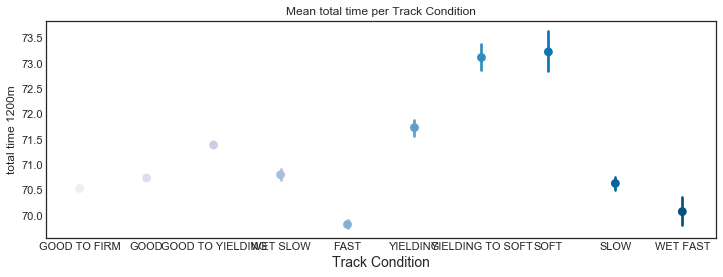

In [281]:
#Line Chart date vs total time

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (12, 4))
sns.pointplot(x='going', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("Track Condition", fontsize=14)
plt.ylabel("total time 1200m")
plt.title("Mean total time per Track Condition");
# plt.savefig('trackcond_avg_time_point.png')

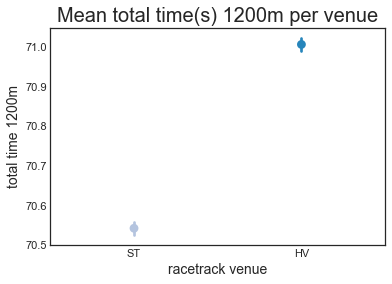

In [289]:
#Line Chart date vs total time

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 4))
sns.pointplot(x='venue', y='total_time', data=total_time_dist1_df, 
              palette= "PuBu")
plt.xlabel("racetrack venue", fontsize=14)
plt.ylabel("total time 1200m", fontsize=14)
plt.title("Mean total time(s) 1200m per venue", fontsize=20);
plt.savefig('venue_time_1200m_point.png')

In [63]:
#need to take population into subsets based on total distance of race (1200 first distance)
total_time_dist1_df = df[(df['distance'] == 1200)]

In [325]:
# split between venues for hypothesis testing

HV_time_dist1_df = total_time_dist1_df[(total_time_dist1_df['venue'] == 'HV')]
ST_time_dist1_df = total_time_dist1_df[(total_time_dist1_df['venue'] == 'ST')]

In [330]:
ST_time_dist1_df['surface'].max()


1

In [326]:
SV_time_dist1_df['surface'].count()

NameError: name 'SV_time_dist1_df' is not defined

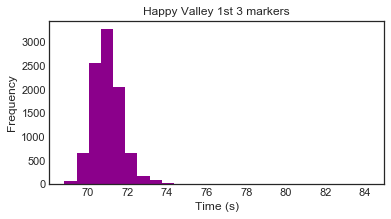

In [104]:
# histogram HV TIME distance 1200

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = HV_time_dist1_df['total_time']
plt.hist(data, bins=25,
         histtype='stepfilled', color='darkmagenta',
         edgecolor='none');
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Happy Valley 1st 3 markers");
# plt.savefig('Happy_Valley_time_histo.png')

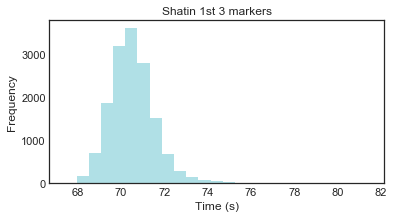

In [103]:
# histogram ST TIME distance 1200

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = ST_time_dist1_df['total_time']
plt.hist(data, bins=25,
         histtype='stepfilled', color='powderblue',
         edgecolor='none');
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Shatin 1st 3 markers");
# plt.savefig('Shatin_time_histo.png')

## Hypothesis Testing

In [68]:
#establish the two population time arrays
HV_time_dist = np.array(HV_time_dist1_df ['total_time'])
ST_time_dist = np.array(ST_time_dist1_df ['total_time'])

In [139]:
# Two Sample Approximate Test of Population Means
# Happy valley population

HVpop_std = np.std(HV_time_dist)
HVpop_mu = np.mean(HV_time_dist)
HVpop_var = np.var(HV_time_dist)
print(f"The Happy Valley population std dev: {HVpop_std}, \
population variance: {HVpop_var},and population mean: {HVpop_mu}")
HVpopulation = stats.norm(HVpop_mu, HVpop_std)

The Happy Valley population std dev: 0.7856470275604992, population variance: 0.6172412519146478,and population mean: 71.00644078398665


In [140]:
# Two Sample Approximate Test of Population Means
# Shatin population

STpop_std = np.std(ST_time_dist)
STpop_mu = np.mean(ST_time_dist)
STpop_var = np.var(ST_time_dist)
print(f"The Sha Tin population std dev: {STpop_std}, \
population variance: {STpop_var},and population mean: {STpop_mu}")
STpopulation = stats.norm(STpop_mu, STpop_std)

The Sha Tin population std dev: 1.0674258030375738, population variance: 1.1393978449904094,and population mean: 70.54171356684103


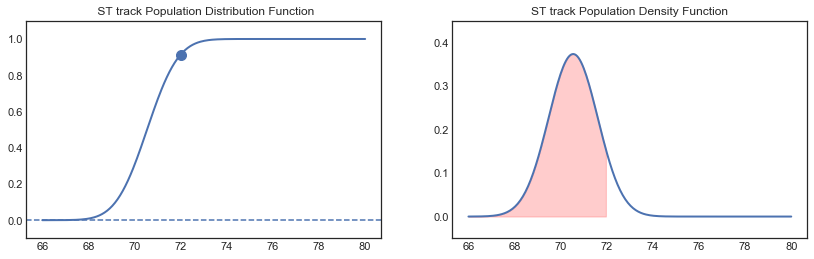

In [132]:
## CDF vs PDF ST track population
normal = stats.norm(STpop_mu, STpop_std)

x = np.linspace(66, 80, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(72, normal.cdf(72), s=100)
ax[0].axhline(y=normal.cdf(65), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title(" ST track Population Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.45)
ax[1].set_title("ST track Population Density Function")
_ = ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 72) ),
                   color="red", alpha=0.2)

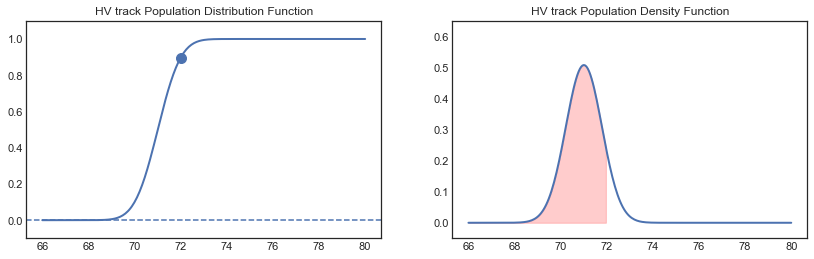

In [130]:
## CDF vs PDF HV track population
normal = stats.norm(HVpop_mu, HVpop_std)

x = np.linspace(66, 80, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(72, normal.cdf(72), s=100)
ax[0].axhline(y=normal.cdf(65), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("HV track Population Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.65)
ax[1].set_title("HV track Population Density Function")
_ = ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 72) ),
                   color="red", alpha=0.2)

In [150]:
# HVsample = HVpopulation.rvs(1000)
# STsample = STpopulation.rvs(1000)
HVsample = np.random.choice(HV_time_dist, 200)
STsample = np.random.choice(ST_time_dist, 200)
print(type(HVsample))

<class 'numpy.ndarray'>


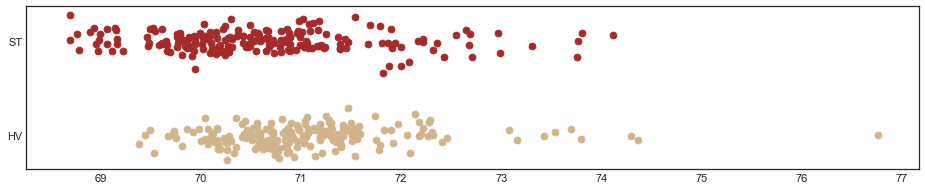

In [151]:
# speeds: HV vs ST
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HVsample, 
           np.repeat(0, len(HVsample)) + \
           np.random.normal(0, 0.1, len(HVsample)), ## jitter
           color = 'tan', s=45)
ax.scatter(STsample, 
           np.repeat(1, len(STsample)) + \
           np.random.normal(0, 0.1, len(STsample)), 
           color = 'brown', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV", "ST"]);

In [152]:
# Welsh's t-test There are two independent variances, which we have no reason to believe are the same.
#The variances are independent parameters, unrelated to the mean.
#In cases where we have to independently estimate the variance of a normal distribution 
#from the same samples we are testing, 
#this estimation of the variance contributes to uncertainty in our test. 
#This means that the Normal distribution is then too precise 
#to use as a conservative estimate of the p-value.

def welch_test_statistic(sample_1, sample_2):
    numerator = np.mean(sample_1) - np.mean(sample_2)
    denominator_sq = (np.var(sample_1) / len(sample_1)) + \
                        (np.var(sample_2) / len(sample_2))
    return numerator / np.sqrt(denominator_sq)

In [153]:

test_statistic = welch_test_statistic(STsample, HVsample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic))

Welch Test Statistic: -4.50


In [155]:
def welch_satterhwaithe_df(samp_1, samp_2):
    ss1 = len(samp_1)
    ss2 = len(samp_2)
    df = (((np.var(samp_1)/ss1 + np.var(samp_2)/ss2)**(2.0)) / 
        ((np.var(samp_1)/ss1)**(2.0)/(ss1 - 1)
         + (np.var(samp_2)/ss2)**(2.0)/(ss2 - 1)))
    return df

In [156]:
degrees_free = welch_satterhwaithe_df(STsample, HVsample)
print(f'Degrees of Freedom for Welch\'s Test: {degrees_free}')

Degrees of Freedom for Welch's Test: 393.2117029076125


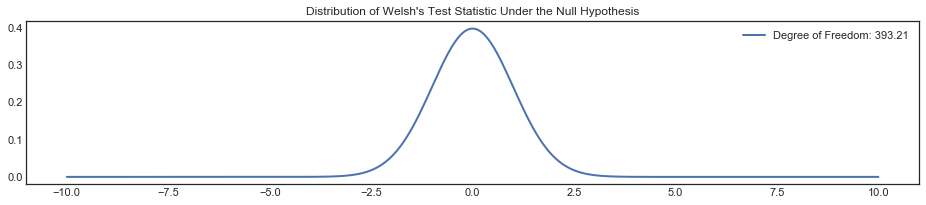

In [157]:

x = np.linspace(-10, 10, num=250)

fig, ax = plt.subplots(1, figsize=(16, 3))
students = stats.t(degrees_free)
ax.plot(x, students.pdf(x), linewidth=2, label="Degree of Freedom: {:2.2f}".format(degrees_free))
ax.legend()
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis");

In [158]:
# Do we have enough evidence to conclude that one is better?
p_value = students.cdf(test_statistic) + (1 - students.cdf(-test_statistic))
print("p-value for different average times : {:2.14f}".format(p_value))

p-value for different average times : 0.00000888155870


In [159]:
test_stat_better1 = welch_test_statistic(HVsample, STsample)

p_value = 1 - students.cdf(test_stat_better1)
print("p-value for HV time over distance greater than ST: {:2.14f}".format(p_value))

p-value for HV time over distance greater than ST: 0.00000444077935


In [142]:
# what if i do it again and limit it to track type 0 TURF ONLY
# split between venues for hypothesis testing

HV0_time_dist1_df = HV_time_dist1_df[(HV_time_dist1_df['surface'] == 0)]
ST0_time_dist1_df = ST_time_dist1_df[(ST_time_dist1_df['surface'] == 0)]

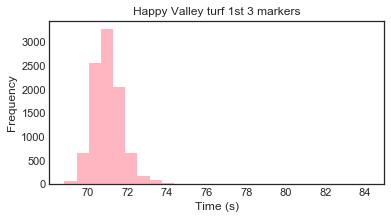

In [106]:
# histogram HV TIME distance 1200 TURF ONLY

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))
data = HV0_time_dist1_df['total_time']
plt.hist(data, bins=25,
         histtype='stepfilled', color='lightpink',
         edgecolor='none');
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Happy Valley turf 1st 3 markers");
# plt.savefig('Happy_Valley_turf_time_histo.png')

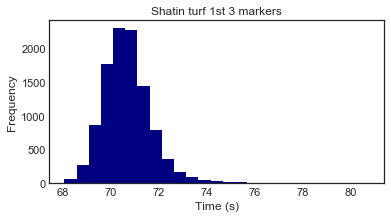

In [214]:
# histogram ST TIME distance 1200 TURF ONLY

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (6, 3))

data = ST0_time_dist1_df['total_time']
plt.hist(data, bins=25,
         histtype='stepfilled', color='navy',
         edgecolor='none');
plt.xlabel("Time (s)")
plt.ylabel("Frequency")
plt.title("Shatin turf 1st 3 markers");
# plt.savefig('Shatin_turf_time_histo.png')

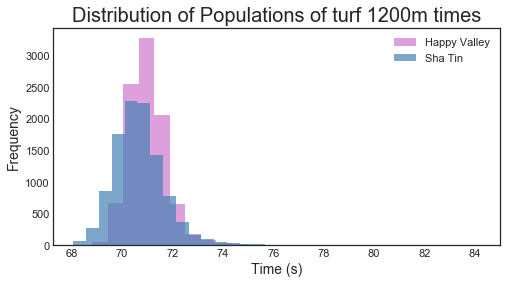

In [333]:
# histogram ST TIME distance 1200 TURF ONLY

plt.style.use('seaborn-white')

fig, ax = plt.subplots(figsize = (8, 4))
data1 = HV0_time_dist1_df['total_time']
plt.hist(data1, bins=25,
         histtype='stepfilled', label = 'Happy Valley', color='plum',
         edgecolor='none')
data = ST0_time_dist1_df['total_time']
plt.hist(data, bins=25,
         histtype='stepfilled', label = 'Sha Tin', color='steelblue',
         edgecolor='none', alpha =0.7);
plt.xlabel("Time (s)",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.legend(loc = 'upper right')
plt.title("Distribution of Populations of turf 1200m times", fontsize=20)
bbox_inches='tight';
# plt.savefig('Overlay_turf_time_samples_histo.png')

In [85]:
#establish the two population time arrays for TURF ONLY
HV0_time_dist = np.array(HV0_time_dist1_df ['total_time'])
ST0_time_dist = np.array(ST0_time_dist1_df ['total_time'])

In [86]:
# Two Sample Approximate Test of Population Means
# Happy valley population TURF ONLY

HV0pop_std = np.std(HV0_time_dist)
HV0pop_mu = np.mean(HV0_time_dist)
HV0pop_var = np.var(HV0_time_dist)
print(HV0pop_std, HV0pop_var, HV0pop_mu)
HV0population = stats.norm(HV0pop_mu, HV0pop_std)

0.7856470275604992 0.6172412519146478 71.00644078398665


In [87]:
# Two Sample Approximate Test of Population Means
# Shatin population TURF ONLY

ST0pop_std = np.std(ST0_time_dist)
ST0pop_mu = np.mean(ST0_time_dist)
ST0pop_var = np.var(ST0_time_dist)
print(ST0pop_std, ST0pop_var, ST0pop_mu)
ST0population = stats.norm(ST0pop_mu, ST0pop_std)

1.0327302612604663 1.0665317925231108 70.6950085861477


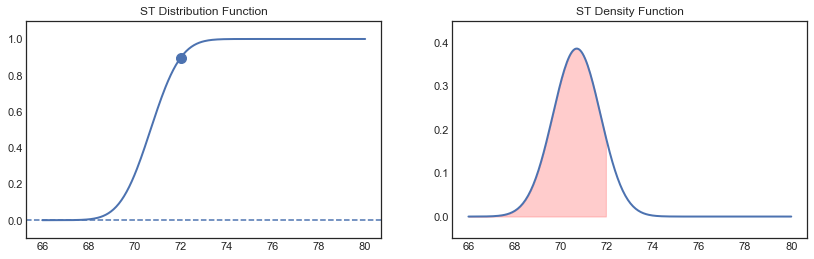

In [108]:
## CDF vs PDF ST track population TURF ONLY
normal = stats.norm(ST0pop_mu, ST0pop_std)

x = np.linspace(66, 80, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(72, normal.cdf(72), s=100)
ax[0].axhline(y=normal.cdf(65), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("ST Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.45)
ax[1].set_title("ST Density Function")
_ = ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 72) ),
                   color="red", alpha=0.2)

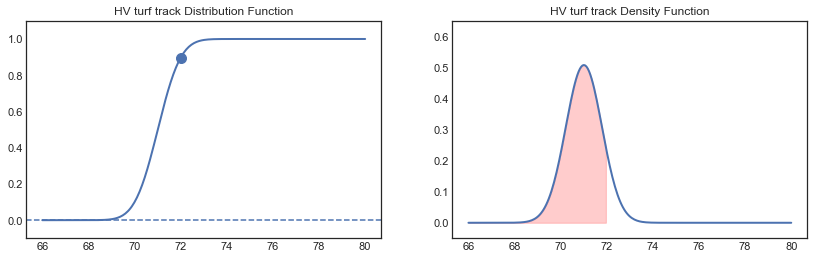

In [107]:
## CDF vs PDF HV track population TURF ONLY
normal = stats.norm(HV0pop_mu, HV0pop_std)

x = np.linspace(66, 80, num=250)
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

ax[0].plot(x, normal.cdf(x), linewidth=2)
ax[0].scatter(72, normal.cdf(72), s=100)
ax[0].axhline(y=normal.cdf(65), linestyle="--") 
ax[0].set_ylim(-0.1, 1.1)
ax[0].set_title("HV turf track Distribution Function")

ax[1].plot(x, normal.pdf(x), linewidth=2)
ax[1].set_ylim(-0.05, 0.65)
ax[1].set_title("HV turf track Density Function")
_ = ax[1].fill_between(x, normal.pdf(x), 0, 
                   where=( (x <= 72) ),
                   color="red", alpha=0.2)

In [200]:
np.random.seed(5)
HV00sample = np.random.choice(HV0_time_dist, 8000)
ST00sample = np.random.choice(ST0_time_dist, 8000)

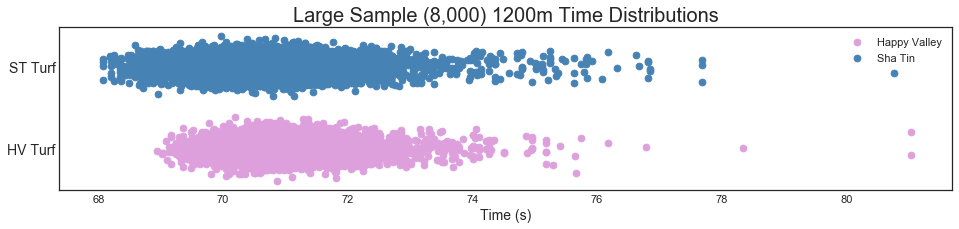

In [334]:
# speeds: HV vs ST TURF ONLY POPULATION
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HV00sample, 
           np.repeat(0, len(HV00sample)) + \
           np.random.normal(0, 0.1, len(HV00sample)), ## jitter
           label = 'Happy Valley', color = 'plum', s=45)
ax.scatter(ST00sample, 
           np.repeat(1, len(ST00sample)) + \
           np.random.normal(0, 0.1, len(ST00sample)), 
           label = "Sha Tin", color = 'steelblue', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV Turf", "ST Turf"], fontsize=14)
ax.set_xlabel("Time (s)", fontsize=14)
ax.legend(loc = 'best')
ax.set_title("Large Sample (8,000) 1200m Time Distributions", fontsize=20)
bbox_inches='tight';
# plt.savefig('LargeSampleScatterHVSTTurf.png')

In [181]:
np.random.seed(5000)
HV0sample = np.random.choice(HV0_time_dist, 100)
ST0sample = np.random.choice(ST0_time_dist, 100)

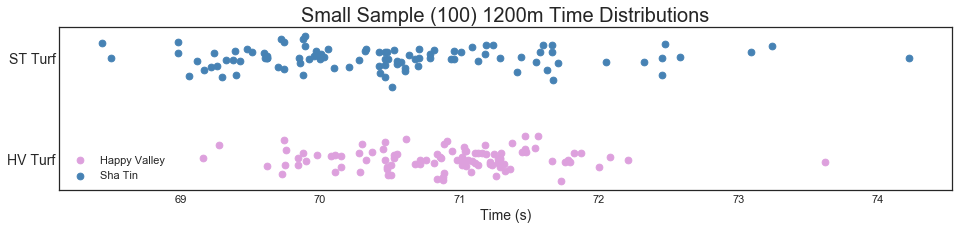

In [335]:
# speeds: HV vs ST TURF ONLY
fig, ax = plt.subplots(1, figsize=(16, 3))

ax.scatter(HV0sample, 
           np.repeat(0, len(HV0sample)) + \
           np.random.normal(0, 0.1, len(HV0sample)), ## jitter
           label = 'Happy Valley', color = 'plum', s=45)
ax.scatter(ST0sample, 
           np.repeat(1, len(ST0sample)) + \
           np.random.normal(0, 0.1, len(ST0sample)), 
           label = "Sha Tin", color = 'steelblue', s=45)
ax.set_yticks([0, 1])
ax.set_yticklabels(["HV Turf", "ST Turf"], fontsize=14)
ax.set_xlabel("Time (s)", fontsize=14)
ax.legend(loc = 'best')
ax.set_title("Small Sample (100) 1200m Time Distributions", fontsize=20)
bbox_inches='tight';
# plt.savefig('SampleScatterHVSTTurf.png')

In [183]:
test_statistic0 = welch_test_statistic(ST0sample, HV0sample)
print("Welch Test Statistic: {:2.2f}".format(test_statistic0))

Welch Test Statistic: -3.20


In [184]:
degrees_free0 = welch_satterhwaithe_df(ST0sample, HV0sample)
print(f'Degrees of Freedom for Welch\'s Test: {degrees_free0}')

Degrees of Freedom for Welch's Test: 170.09974577196962


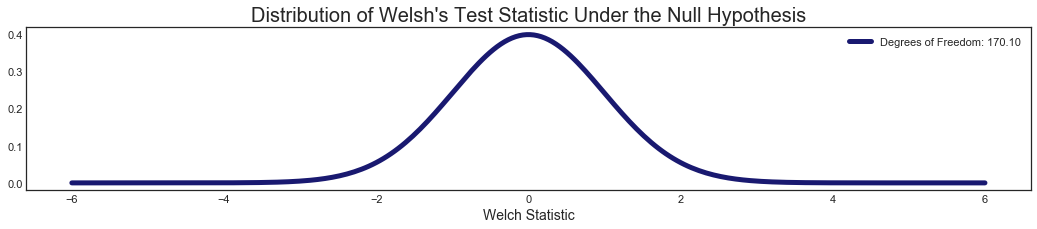

In [336]:
# Distribution of Welsh's Test Statistic Under the Null Hypothesis
x = np.linspace(-6, 6, num=250)

fig, ax = plt.subplots(1, figsize=(18, 3))
students = stats.t(degrees_free0)
ax.plot(x, students.pdf(x), linewidth=5, color = 'midnightblue', label="Degrees of Freedom: {:2.2f}".format(degrees_free0))
ax.legend()
ax.set_xlabel("Welch Statistic", fontsize=14)
ax.set_title("Distribution of Welsh's Test Statistic Under the Null Hypothesis", fontsize=20)
bbox_inches='tight';
# plt.savefig('WelchStatDistribTurf.png')

In [177]:
# Do we have enough evidence to conclude that one is better?
p_value0 = students.cdf(test_statistic0) + (1 - students.cdf(-test_statistic0))
print("p-value for different average times over turf : {:2.14f}".format(p_value0))

p-value for different average times over turf : 0.00164456406652


In [178]:
test_stat_better0 = welch_test_statistic(HV0sample, ST0sample)

p0_value = 1 - students.cdf(test_stat_better0)
print("p-value for HV time over distance greater than ST over turf: {:2.14f}".format(p0_value))

p-value for HV time over distance greater than ST over turf: 0.00082228203326


In [179]:
#calculate pvalue using stats ttest
stats.ttest_ind(ST0sample, HV0sample)

Ttest_indResult(statistic=-3.1830686341634995, pvalue=0.0016924250643034267)

In [180]:
# perform a two tailed ztest to run simulation of p values over time

from statsmodels.stats import weightstats as stests

result, pv = stests.ztest(ST0sample, x2=HV0sample, value=0,alternative='two-sided')
print(result,pv)
# def ztestfunc(n_sims, sample1, sample2):
#     for _ in range(n_sims):
#         p_values = []
#         result, pv = stests.ztest(np.random.choice(sample1, 100), x2=(sample2, 100), value=0,alternative='two-sided')
#         p_values.append(pv)
#     return p_values
# print(ztestfunc(100, ST_time_dist_list, HV_time_dist_list))

-3.1830686341634995 0.0014572306744265488
